<center>
    <h1> Loan Eligibility Predictor</h1>
</center>

In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read the dataset
df = pd.read_csv('C:/Users/ADMIN/MCA_Sem1Project/Bank_Dataset.csv', low_memory=False, header = 1, names=[
    'Loan_status', 'Curr_loan_amt', 'Term', 'Credit_score', 'Yrs_in_curr_job', 'Home_ownership', 'Annual_inc', 'Purpose', 'Monthly_debt',
    'Yrs_of_credit_hist', 'Months_since_last_delinquet', 'No_of_open_acc', 'No_of_credit_problems', 'Curr_credit_bal', 'Max_open_credit', 
    'Bankruptcies', 'Tax_liens'])  
df.head()

,Loan_status,Curr_loan_amt,Term,Credit_score,Yrs_in_curr_job,Home_ownership,Annual_inc,Purpose,Monthly_debt,Yrs_of_credit_hist,Months_since_last_delinquet,No_of_open_acc,No_of_credit_problems,Curr_credit_bal,Max_open_credit,Bankruptcies,Tax_liens
0,Loan Given,20032,Short Term,NaN,6 years,Home Mortgage,NaN,Debt Consolidation,81.25,20.0,0.0,15.0,1.0,27381.0,170067.0,NaN,NaN
1,Loan Given,2962,Short Term,745.0,10+ years,Rent,29619.0,Debt Consolidation,81.25,20.0,0.0,15.0,1.0,27381.0,170067.0,NaN,NaN
2,Loan Given,6722,Short Term,NaN,< 1 year,Home Mortgage,NaN,Debt Consolidation,904.07,24.5,0.0,15.0,0.0,6968.0,48388.0,NaN,NaN
3,Loan Given,20845,Short Term,NaN,2 years,Home Mortgage,NaN,Debt Consolidation,923.16,21.3,78.0,9.0,0.0,42381.0,45375.0,NaN,NaN
4,Loan Refused,14587,Short Term,728.0,1 year,Rent,42040.0,Debt Consolidation,923.16,21.3,78.0,9.0,0.0,42381.0,45375.0,NaN,NaN


In [3]:
df.shape  # returns the number of rows and columns

(111098, 17)

In [4]:
df.info()  # provides information about the columns in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111098 entries, 0 to 111097
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loan_status                  111098 non-null  object 
 1   Curr_loan_amt                111098 non-null  int64  
 2   Term                         111098 non-null  object 
 3   Credit_score                 89761 non-null   float64
 4   Yrs_in_curr_job              106405 non-null  object 
 5   Home_ownership               111098 non-null  object 
 6   Annual_inc                   89761 non-null   float64
 7   Purpose                      111096 non-null  object 
 8   Monthly_debt                 111096 non-null  float64
 9   Yrs_of_credit_hist           111096 non-null  float64
 10  Months_since_last_delinquet  52096 non-null   float64
 11  No_of_open_acc               111096 non-null  float64
 12  No_of_credit_problems        111096 non-null  float64
 13 

In [5]:
df.duplicated().sum()  # checks for duplicate values

3250

In [6]:
df = df.drop_duplicates()  # we drop the duplicate values
df.shape

(107848, 17)

In [7]:
df['Loan_status'].unique()  # check for unique values in the Loan_status column

array(['Loan Given', 'Loan Refused'], dtype=object)

In [8]:
scale_mapper = {'Loan Refused':0,   # convert the categorical values to 1 and 0 respectively 
                'Loan Given':1}

In [9]:
df['Loan_status'] = df['Loan_status'].replace(scale_mapper)  # replace the converted values in the original column
df.head()

,Loan_status,Curr_loan_amt,Term,Credit_score,Yrs_in_curr_job,Home_ownership,Annual_inc,Purpose,Monthly_debt,Yrs_of_credit_hist,Months_since_last_delinquet,No_of_open_acc,No_of_credit_problems,Curr_credit_bal,Max_open_credit,Bankruptcies,Tax_liens
0,1,20032,Short Term,NaN,6 years,Home Mortgage,NaN,Debt Consolidation,81.25,20.0,0.0,15.0,1.0,27381.0,170067.0,NaN,NaN
1,1,2962,Short Term,745.0,10+ years,Rent,29619.0,Debt Consolidation,81.25,20.0,0.0,15.0,1.0,27381.0,170067.0,NaN,NaN
2,1,6722,Short Term,NaN,< 1 year,Home Mortgage,NaN,Debt Consolidation,904.07,24.5,0.0,15.0,0.0,6968.0,48388.0,NaN,NaN
3,1,20845,Short Term,NaN,2 years,Home Mortgage,NaN,Debt Consolidation,923.16,21.3,78.0,9.0,0.0,42381.0,45375.0,NaN,NaN
4,0,14587,Short Term,728.0,1 year,Rent,42040.0,Debt Consolidation,923.16,21.3,78.0,9.0,0.0,42381.0,45375.0,NaN,NaN


In [10]:
df['Term'].unique()  # check for unique values in the Term column

array(['Short Term', 'Long Term'], dtype=object)

In [11]:
scale_mapper_term = {'Short Term':0,   
                'Long Term':1}
df['Term'] = df['Term'].replace(scale_mapper_term)
df.head()

,Loan_status,Curr_loan_amt,Term,Credit_score,Yrs_in_curr_job,Home_ownership,Annual_inc,Purpose,Monthly_debt,Yrs_of_credit_hist,Months_since_last_delinquet,No_of_open_acc,No_of_credit_problems,Curr_credit_bal,Max_open_credit,Bankruptcies,Tax_liens
0,1,20032,0,NaN,6 years,Home Mortgage,NaN,Debt Consolidation,81.25,20.0,0.0,15.0,1.0,27381.0,170067.0,NaN,NaN
1,1,2962,0,745.0,10+ years,Rent,29619.0,Debt Consolidation,81.25,20.0,0.0,15.0,1.0,27381.0,170067.0,NaN,NaN
2,1,6722,0,NaN,< 1 year,Home Mortgage,NaN,Debt Consolidation,904.07,24.5,0.0,15.0,0.0,6968.0,48388.0,NaN,NaN
3,1,20845,0,NaN,2 years,Home Mortgage,NaN,Debt Consolidation,923.16,21.3,78.0,9.0,0.0,42381.0,45375.0,NaN,NaN
4,0,14587,0,728.0,1 year,Rent,42040.0,Debt Consolidation,923.16,21.3,78.0,9.0,0.0,42381.0,45375.0,NaN,NaN


In [12]:
df['Yrs_in_curr_job'].unique()   # check for unique values in the Yrs_in_curr_job column

array(['6 years', '10+ years', '< 1 year', '2 years', '1 year', '3 years',
       '5 years', '9 years', '4 years', '7 years', nan, '8 years'],
      dtype=object)

In [13]:
replace_years = {
    '10+ years': 10,
    '< 1 year': 0
}
df['Yrs_in_curr_job'] = df['Yrs_in_curr_job'].replace(replace_years)

In [14]:
# remove years word from each values for easy understanding
df['Yrs_in_curr_job'] = df['Yrs_in_curr_job'].apply(lambda x: str(x).split()[0] if isinstance(x, str) else x)   
df.head()

,Loan_status,Curr_loan_amt,Term,Credit_score,Yrs_in_curr_job,Home_ownership,Annual_inc,Purpose,Monthly_debt,Yrs_of_credit_hist,Months_since_last_delinquet,No_of_open_acc,No_of_credit_problems,Curr_credit_bal,Max_open_credit,Bankruptcies,Tax_liens
0,1,20032,0,NaN,6,Home Mortgage,NaN,Debt Consolidation,81.25,20.0,0.0,15.0,1.0,27381.0,170067.0,NaN,NaN
1,1,2962,0,745.0,10,Rent,29619.0,Debt Consolidation,81.25,20.0,0.0,15.0,1.0,27381.0,170067.0,NaN,NaN
2,1,6722,0,NaN,0,Home Mortgage,NaN,Debt Consolidation,904.07,24.5,0.0,15.0,0.0,6968.0,48388.0,NaN,NaN
3,1,20845,0,NaN,2,Home Mortgage,NaN,Debt Consolidation,923.16,21.3,78.0,9.0,0.0,42381.0,45375.0,NaN,NaN
4,0,14587,0,728.0,1,Rent,42040.0,Debt Consolidation,923.16,21.3,78.0,9.0,0.0,42381.0,45375.0,NaN,NaN


In [15]:
df['Home_ownership'].unique()   # check for unique values in the Home_ownership column

array(['Home Mortgage', 'Rent', 'Own Home', 'HaveMortgage'], dtype=object)

In [16]:
replace_ownership = {
    'Home Mortgage': 0,
    'Rent': 1,
    'Own Home': 2,
    'HaveMortgage': 3
}

In [17]:
df['Home_ownership'] = df['Home_ownership'].replace(replace_ownership)
df.head()

,Loan_status,Curr_loan_amt,Term,Credit_score,Yrs_in_curr_job,Home_ownership,Annual_inc,Purpose,Monthly_debt,Yrs_of_credit_hist,Months_since_last_delinquet,No_of_open_acc,No_of_credit_problems,Curr_credit_bal,Max_open_credit,Bankruptcies,Tax_liens
0,1,20032,0,NaN,6,0,NaN,Debt Consolidation,81.25,20.0,0.0,15.0,1.0,27381.0,170067.0,NaN,NaN
1,1,2962,0,745.0,10,1,29619.0,Debt Consolidation,81.25,20.0,0.0,15.0,1.0,27381.0,170067.0,NaN,NaN
2,1,6722,0,NaN,0,0,NaN,Debt Consolidation,904.07,24.5,0.0,15.0,0.0,6968.0,48388.0,NaN,NaN
3,1,20845,0,NaN,2,0,NaN,Debt Consolidation,923.16,21.3,78.0,9.0,0.0,42381.0,45375.0,NaN,NaN
4,0,14587,0,728.0,1,1,42040.0,Debt Consolidation,923.16,21.3,78.0,9.0,0.0,42381.0,45375.0,NaN,NaN


In [18]:
df.describe().T   # gives descriptive statistics for each numerical column

,count,mean,std,min,25%,50%,75%,max
Loan_status,107848.0,7.666345e-01,4.229748e-01,0.0,1.00,1.00,1.00,1.00
Curr_loan_amt,107848.0,1.182358e+07,3.226948e+07,491.0,8183.00,14239.50,23964.00,99999999.00
Term,107848.0,2.745160e-01,4.462721e-01,0.0,0.00,0.00,1.00,1.00
Credit_score,86511.0,1.089707e+03,1.499367e+03,585.0,706.00,725.00,741.00,7510.00
Home_ownership,107848.0,6.106557e-01,6.582083e-01,0.0,0.00,1.00,1.00,3.00
Annual_inc,86511.0,7.250384e+04,5.614972e+04,4033.0,44739.00,61860.00,86915.50,8713547.00
Monthly_debt,107846.0,9.723406e+02,6.414733e+02,0.0,538.02,852.89,1263.36,22939.12
Yrs_of_credit_hist,107846.0,1.821923e+01,7.016844e+00,3.6,13.50,17.00,21.70,70.50
Months_since_last_delinquet,50354.0,3.492654e+01,2.197830e+01,0.0,16.00,32.00,51.00,176.00
No_of_open_acc,107846.0,1.113506e+01,5.007875e+00,0.0,8.00,10.00,14.00,76.00


In [19]:
df.isna().sum()  # checks for null values

Loan_status                        0
Curr_loan_amt                      0
Term                               0
Credit_score                   21337
Yrs_in_curr_job                 4555
Home_ownership                     0
Annual_inc                     21337
Purpose                            2
Monthly_debt                       2
Yrs_of_credit_hist                 2
Months_since_last_delinquet    57494
No_of_open_acc                     2
No_of_credit_problems              2
Curr_credit_bal                    2
Max_open_credit                    2
Bankruptcies                     223
Tax_liens                         12
dtype: int64

In [20]:
# For numerical and discrete columns, we fill na values with its mode
mode_cols = ['Credit_score', 'Yrs_in_curr_job', 'Months_since_last_delinquet', 'Bankruptcies', 'Tax_liens']
for i in mode_cols:
    df[i].fillna(df[i].mode()[0],inplace=True)
df.isna().sum()

Loan_status                        0
Curr_loan_amt                      0
Term                               0
Credit_score                       0
Yrs_in_curr_job                    0
Home_ownership                     0
Annual_inc                     21337
Purpose                            2
Monthly_debt                       2
Yrs_of_credit_hist                 2
Months_since_last_delinquet        0
No_of_open_acc                     2
No_of_credit_problems              2
Curr_credit_bal                    2
Max_open_credit                    2
Bankruptcies                       0
Tax_liens                          0
dtype: int64

In [21]:
# For numerical and continuous columns, we fill na values with its median
median_value = df['Annual_inc'].median()
df['Annual_inc'].fillna(median_value, inplace=True)
df.isna().sum()

Loan_status                    0
Curr_loan_amt                  0
Term                           0
Credit_score                   0
Yrs_in_curr_job                0
Home_ownership                 0
Annual_inc                     0
Purpose                        2
Monthly_debt                   2
Yrs_of_credit_hist             2
Months_since_last_delinquet    0
No_of_open_acc                 2
No_of_credit_problems          2
Curr_credit_bal                2
Max_open_credit                2
Bankruptcies                   0
Tax_liens                      0
dtype: int64

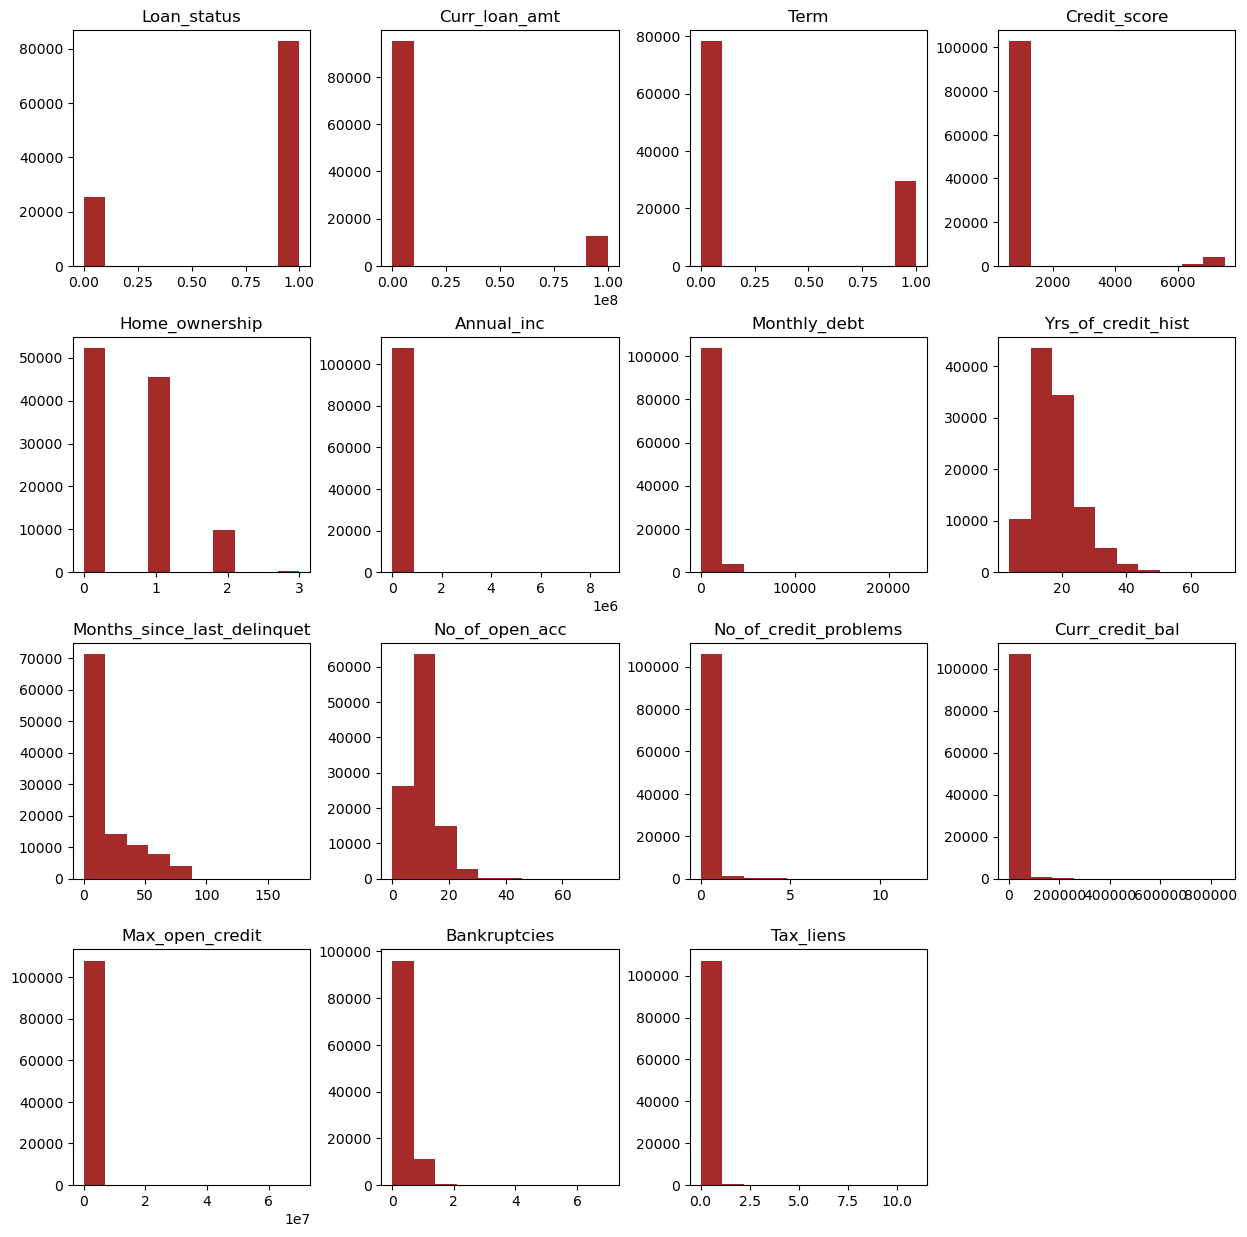

In [22]:
p = df.hist(figsize = (15,15), color='brown', grid=False)  # creates histogram

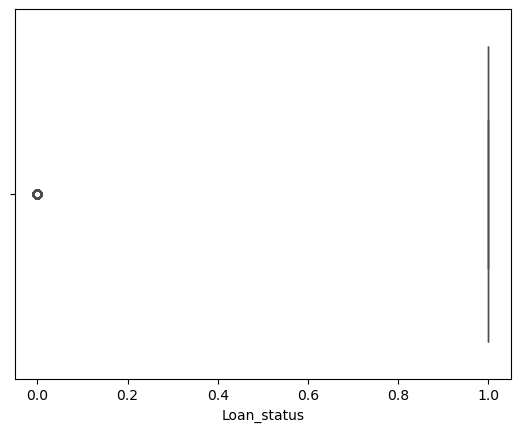

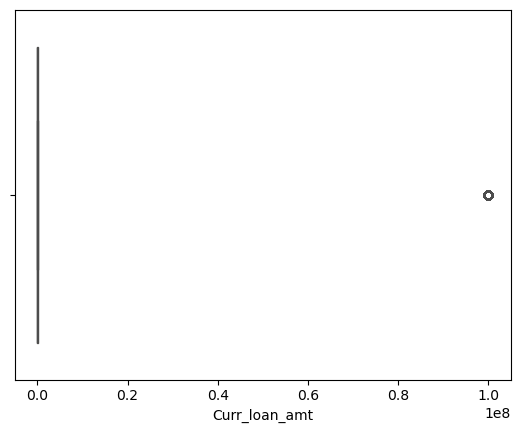

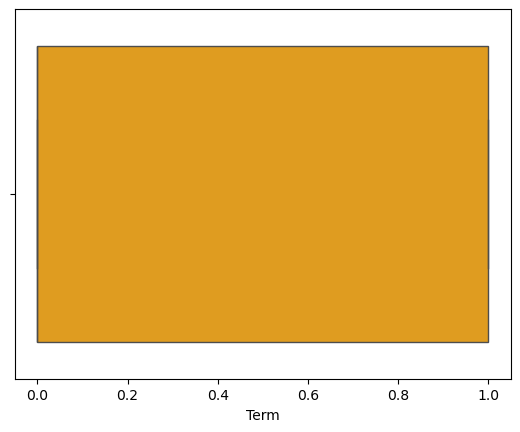

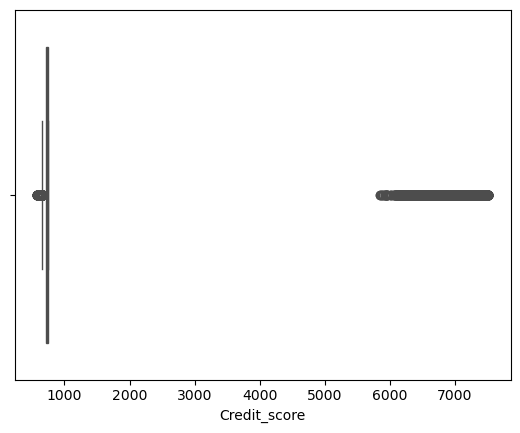

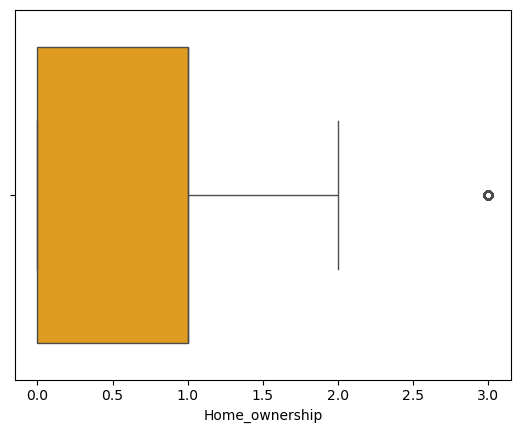

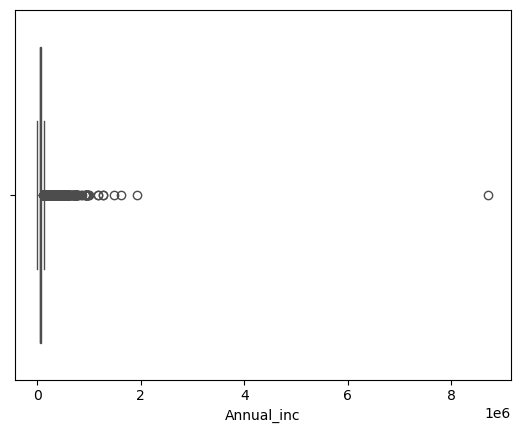

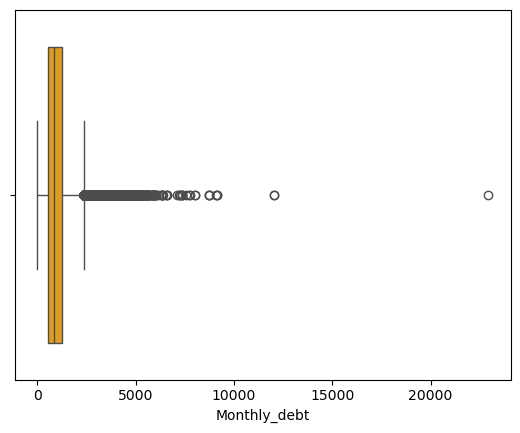

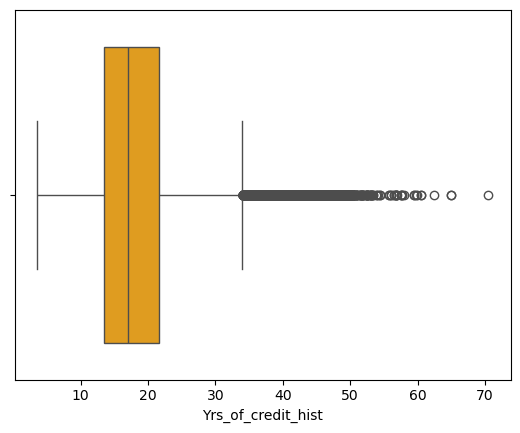

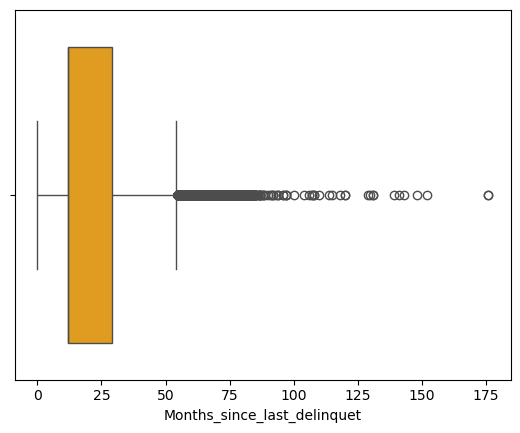

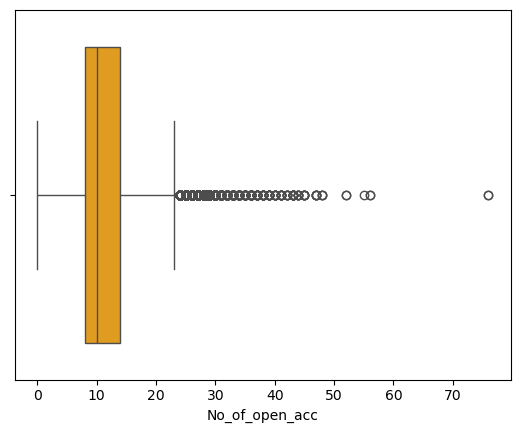

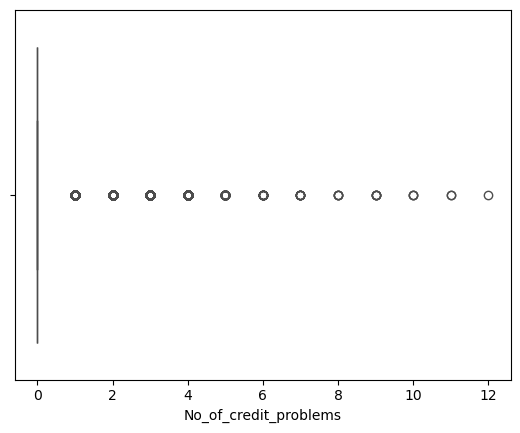

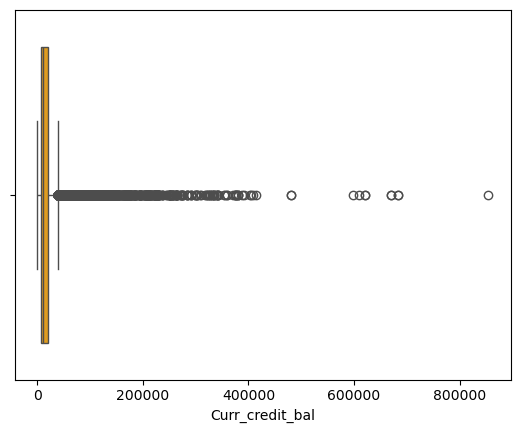

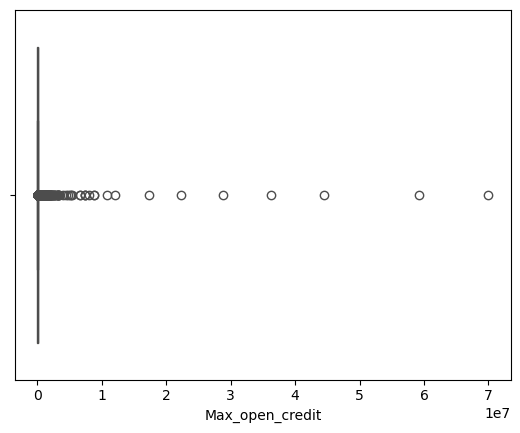

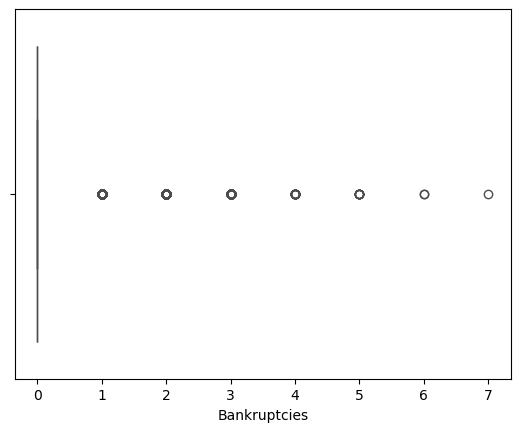

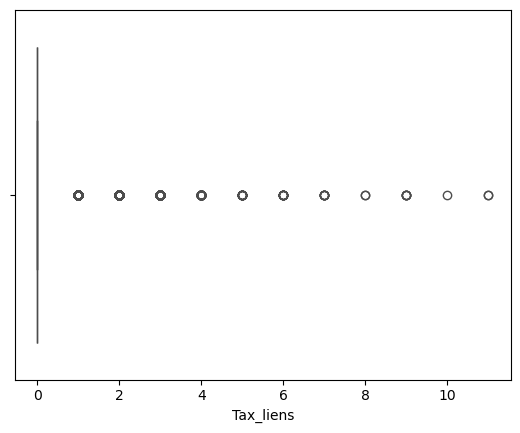

In [23]:
# To check for outliers, we generally use boxplot
for i in df.select_dtypes(include='number').columns:
    sns.boxplot(data=df,x=i, color='orange')
    plt.show()

In [24]:
# function to return the lower wisker and upper wisker of a column
def wiskers(col): 
    q1,q3 = np.percentile(col,[25,75])  # calculates the 25 and 75 percentile respectively
    iqr = q3 - q1  # calculates the inter quartile range
    lw = q1 - 1.5 * iqr  # calculates the lower wisker
    uw = q3 + 1.5 * iqr  # calculates the upper wisker
    return lw, uw

In [25]:
wiskers(df['Annual_inc'])  # returns the lower and upper wisker for Credit_score column

(3678.0, 124910.0)

In [26]:
# remove outliers using iqr method
original_df = df  # creates copy of original dataframe
outlier_col = ['Annual_inc']  
for i in outlier_col:
    lw,uw = wiskers(original_df[i])
    df = original_df[(original_df[i] >= lw) & (original_df[i] <= uw)]  # For removing outliers
df.shape

(100397, 17)

In [27]:
# replace the rows in Curr_loan_amt having values as 99999999 to the median of its column (Refer dataset to udnerstand this)
curr_loan_amt_median = df[df['Curr_loan_amt'] < 99999999]['Curr_loan_amt'].median()
df.loc[df['Curr_loan_amt'] == 99999999, 'Curr_loan_amt'] = curr_loan_amt_median
df.shape

(100397, 17)

In [28]:
monthly_debt_thresh = 10000   # keeping threshold value as 10000
df = df[(df['Monthly_debt'] <= monthly_debt_thresh)]
df.shape   # 4 rows removed

(100393, 17)

In [29]:
max_open_credit_thresh = 50000000  # keeping threshold value as 50000000
df = df[(df['Max_open_credit'] <= max_open_credit_thresh)]
df.shape   # 2 row removed

(100391, 17)

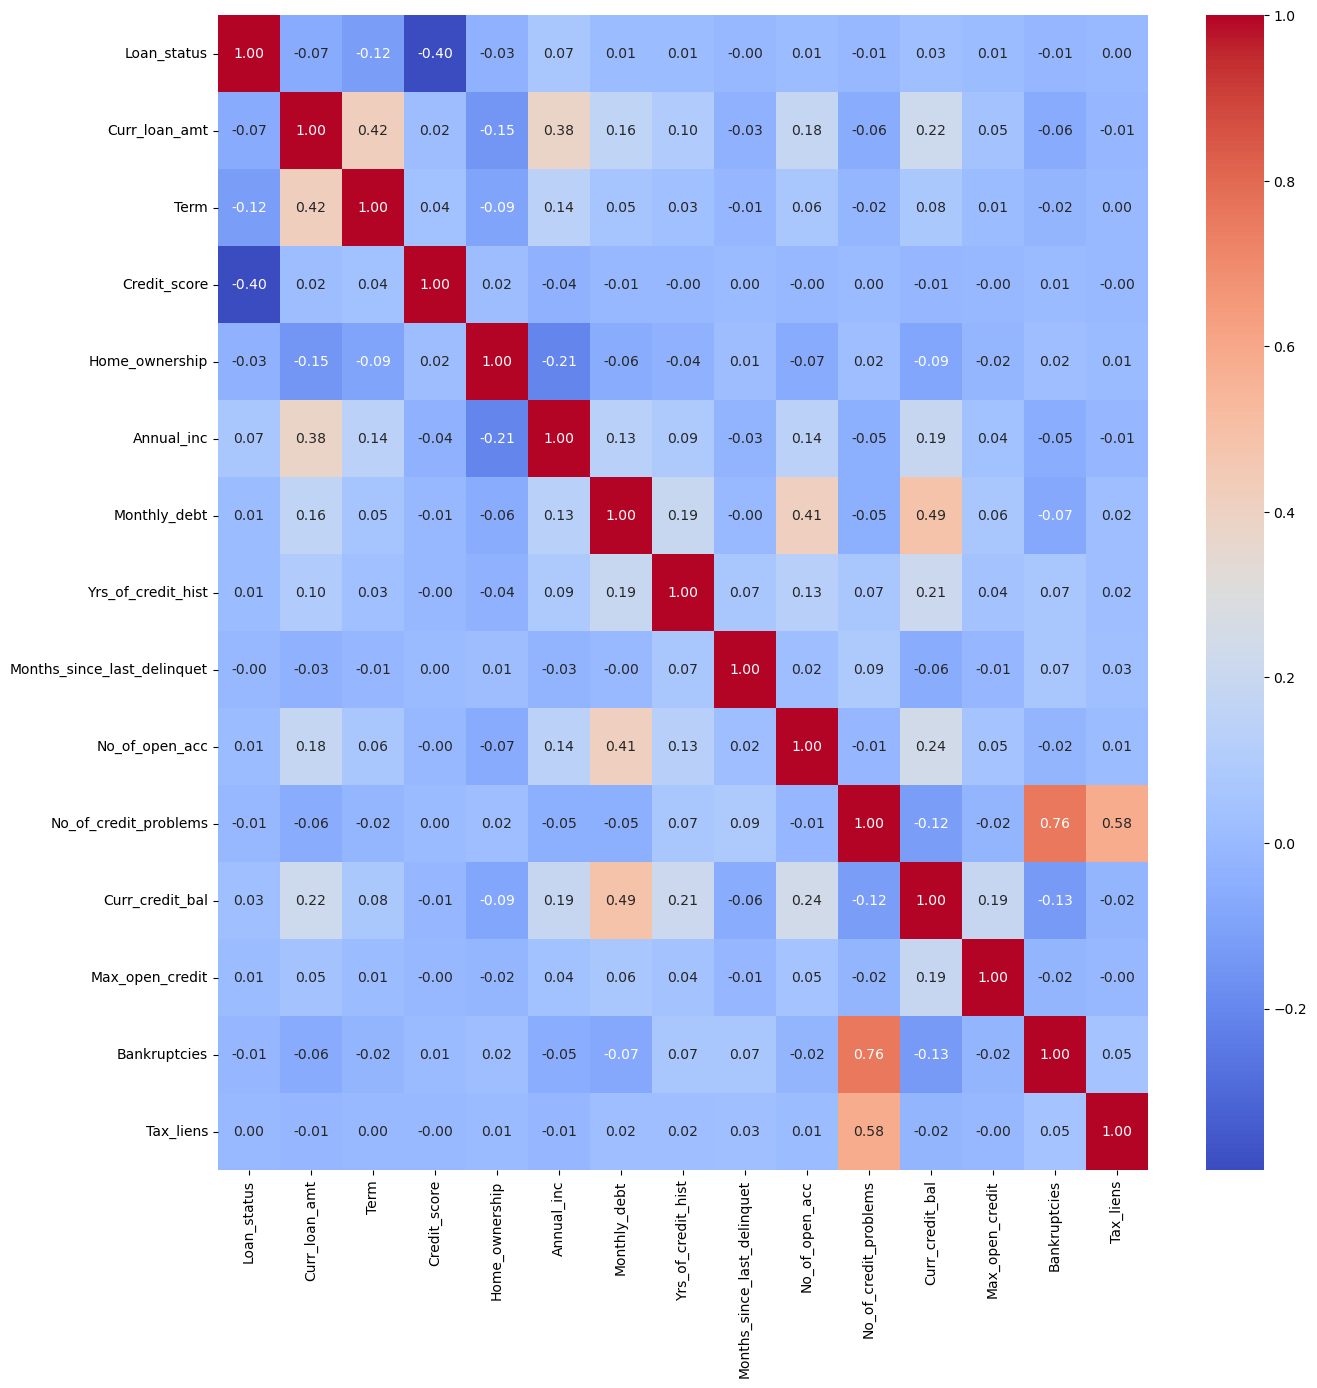

In [47]:
plt.figure(figsize=(15, 15))
correlation_matrix = df.select_dtypes(include='number').corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

# From this heatmap, we can conclude that the variables with positive correlation with respect to Loan_status are:
# Annual_inc (0.07)
# Monthly_debt (0.01)
# Yrs_of_credit_hist (0.01)
# No of open accounts (0.01)
# Curr_credit_bal (0.03)
# Max_open_credit (0.01)

In [31]:
df['Purpose'].unique()   # check for unique values in the Purpose column
# Since there are so many unique values, using dummies is a better option

array(['Debt Consolidation', 'Home Improvements', 'Educational Expenses',
       'Other', 'Medical Bills', 'other', 'Buy House', 'Business Loan',
       'small_business', 'major_purchase', 'Take a Trip', 'moving',
       'vacation', 'Buy a Car', 'wedding', 'renewable_energy'],
      dtype=object)

In [32]:
dummies = pd.get_dummies(df.Purpose, drop_first=True).astype(int)  # drop_first = True is used to avoid multiple correlation
df = df.drop(['Purpose'],axis=1)  # drops the Purpose column since we have dummy values now
new_df = pd.concat([df, dummies], axis=1)   # join the 2 dataframes
new_df.head()

,Loan_status,Curr_loan_amt,Term,Credit_score,Yrs_in_curr_job,Home_ownership,Annual_inc,Monthly_debt,Yrs_of_credit_hist,Months_since_last_delinquet,...,Medical Bills,Other,Take a Trip,major_purchase,moving,other,renewable_energy,small_business,vacation,wedding
0,1,20032,0,747.0,6,0,61860.0,81.25,20.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,2962,0,745.0,10,1,29619.0,81.25,20.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1,6722,0,747.0,0,0,61860.0,904.07,24.5,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1,20845,0,747.0,2,0,61860.0,923.16,21.3,78.0,...,0,0,0,0,0,0,0,0,0,0
4,0,14587,0,728.0,1,1,42040.0,923.16,21.3,78.0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# Now we make a dataframe for all the predictor variables
X = new_df[['Annual_inc', 'Monthly_debt', 'Yrs_of_credit_hist', 'No_of_open_acc', 'Curr_credit_bal', 'Max_open_credit']]
X.head()

,Annual_inc,Monthly_debt,Yrs_of_credit_hist,No_of_open_acc,Curr_credit_bal,Max_open_credit
0,61860.0,81.25,20.0,15.0,27381.0,170067.0
1,29619.0,81.25,20.0,15.0,27381.0,170067.0
2,61860.0,904.07,24.5,15.0,6968.0,48388.0
3,61860.0,923.16,21.3,9.0,42381.0,45375.0
4,42040.0,923.16,21.3,9.0,42381.0,45375.0


In [34]:
# We make another dataframe for the target variable
Y = new_df['Loan_status']
Y.head()

0    1
1    1
2    1
3    1
4    0
Name: Loan_status, dtype: int64

In [35]:
from sklearn.preprocessing import MinMaxScaler   # used to scale values between 0 and 1
scaler = MinMaxScaler()  # create object of MinMaxScaler
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.47841518, 0.00890973, 0.245142  , 0.19736842, 0.03203948,
        0.00468706],
       [0.21167847, 0.00890973, 0.245142  , 0.19736842, 0.03203948,
        0.00468706],
       [0.47841518, 0.09913874, 0.31240658, 0.19736842, 0.0081535 ,
        0.00133358],
       ...,
       [0.37528956, 0.03254109, 0.16741405, 0.01315789, 0.        ,
        0.        ],
       [0.37528956, 0.        , 0.16442451, 0.        , 0.        ,
        0.        ],
       [0.22735621, 0.00776161, 0.13004484, 0.        , 0.        ,
        0.        ]])

In [36]:
from sklearn.model_selection import train_test_split   # import train_test_split for splitting the data into X and Y
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=10)  # split the data into 80-20

In [37]:
len_X_train = len(X_train)
len_X_test = len(X_test)
len_Y_train = len(Y_train)
len_Y_test = len(Y_test)
len_X_train, len_X_test, len_Y_train, len_Y_test

(80312, 20079, 80312, 20079)

In [38]:
# import some models to find the best model
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [39]:
cross_val_score(LogisticRegression(),X_train, Y_train, cv=3)

array([0.76164506, 0.76164506, 0.76163616])

In [40]:
cross_val_score(GradientBoostingClassifier(),X_train, Y_train, cv=3)

array([0.76145829, 0.76149565, 0.76144938])

In [41]:
cross_val_score(RandomForestClassifier(),X_train, Y_train, cv=3)

array([0.75395017, 0.75488402, 0.75379156])

In [42]:
cross_val_score(DecisionTreeClassifier(),X_train, Y_train, cv=3)

array([0.63370812, 0.63710732, 0.63156518])

In [43]:
cross_val_score(XGBClassifier(),X_train, Y_train, cv=3)

array([0.75768556, 0.75858205, 0.756257  ])

In [44]:
cross_val_score(KNeighborsClassifier(),X_train, Y_train, cv=3)

array([0.70987262, 0.71614807, 0.71307434])

In [45]:
# From the above scores, we can conclude that LogisticRegression() is the best suited model for this dataset

In [46]:
model = LogisticRegression()
model.fit(X_train, Y_train)
model

LogisticRegression()

In [47]:
score = model.score(X_test, Y_test)  # Calculate the score
rounded_score = round(score, 2)  # Round the score to 2 decimal point
print(rounded_score)  # Print the rounded score
# 76% accurate

0.76


In [48]:
import pickle as p
with open('loan_eligibility_predictor_pickle', 'wb') as f:
    p.dump(model, f)